# ML Model for Soil Image Type Classification

In [1]:
train_data_directory = 'new_image_dataset/train'
test_data_directory = 'new_image_dataset/test'

In [2]:
import os # operating system
import re # regular expression
import cv2 # open cv
import time
import numpy as np
from os import listdir
from os.path import isfile, join
from random import randrange # random range
import matplotlib.pyplot as plt
import tensorflow as tf

load_model = tf.keras.models.load_model
image = tf.keras.preprocessing.image
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
Sequential = tf.keras.models.Sequential
Dense = tf.keras.layers.Dense
Activation = tf.keras.layers.Activation
Flatten = tf.keras.layers.Flatten
Conv2D = tf.keras.layers.Conv2D
MaxPooling2D = tf.keras.layers.MaxPooling2D

In [3]:
# initiate data preprocessing tools

# This step processes the images into a format that
# 1. makes the data readable to the model
# 2. provides more training material for the model to train from
# the `training_data_processor` below scales the data so that it can be
# a model input, but also takes each image and augments it so that
# the model can learn from multiple variations of the same image.
# it flips it horizontally, rotates it, shifts it, and more so that 
# the model learns from the soil photo rather than the orientation size
training_data_processor  = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    zoom_range = 0.2,
    rotation_range = 10,
    shear_range = 0.2,
    height_shift_range = 0.1,
    width_shift_range = 0.1,
)
# for the testing images, we don't need to create multiple variatinos
test_data_processor = ImageDataGenerator(rescale=1./255)


# load data into python

training_data = training_data_processor.flow_from_directory(
    train_data_directory,
    target_size = (256, 256), # pixels
    batch_size = 32,
    class_mode = 'categorical',
)

testing_data = test_data_processor.flow_from_directory(
    test_data_directory,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)

Found 200 images belonging to 5 classes.
Found 40 images belonging to 5 classes.


### Model building

In [4]:
# choose model parameters
num_conv_layers = 3
num_dense_layers = 2
layer_size = 28 # limit the layer size as we dont want to over fit the model
num_training_epochs = 20
MODEL_NAME = 'soil'

CLASSES = ['clay','gravel','humus','sand','silt']

In [6]:
# initiate model variable
model = Sequential()

# begin adding properties to model variable
# e.g. add a convulutional layer
model.add(Conv2D(layer_size, (3,3), input_shape=(256, 256, 3)))
model.add(Activation('relu')) # rectified linear unit
model.add(MaxPooling2D(pool_size=(2,2)))

# add additional convolutional layers based on num_conv_layers
for _ in range(num_conv_layers-1):
    model.add(Conv2D(layer_size, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

# reduce dimensionality
model.add(Flatten())

# add fully connected "dense" layers if specified
for _ in range(num_dense_layers):
    model.add(Dense(layer_size))
    model.add(Activation('relu'))

# output layer
model.add(Dense(3))
model.add(Activation('softmax'))

# compile the sequential model with all added properties
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# use the data already loaded to train/tune the model
model.fit(
    training_data, 
    epochs = num_training_epochs, 
    validation_data = testing_data)

# save the trained model
model.save(f'{MODEL_NAME}.h5')

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "C:\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\traitlets\config\application.py", line 972, in launch_instance
      app.start()
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Python310\lib\asyncio\base_events.py", line 595, in run_forever
      self._run_once()
    File "C:\Python310\lib\asyncio\base_events.py", line 1881, in _run_once
      handle._run()
    File "C:\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\ipykernel\kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\ipykernel\kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell
      await result
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\ipykernel\kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\IPython\core\interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\IPython\core\interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\IPython\core\interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ERIC ECHEMANE\AppData\Local\Temp\ipykernel_8680\3387692185.py", line 35, in <cell line: 35>
      model.fit(
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\keras\engine\training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "c:\Users\ERIC ECHEMANE\Desktop\Projects\Soil Classification Training\env\lib\site-packages\keras\backend.py", line 5134, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[32,3] labels_size=[32,5]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_2007]

### Model testing

In [7]:
def make_prediction(image_fp):
    im = cv2.imread(image_fp) # load the image from the given file path (image_fp)
    plt.imshow(im[:,:,[2,1,0]]) # swap the colors because open-cv swaps the rgb colors
    img = image.load_img(image_fp, target_size = (256, 256))
    img = image.img_to_array(img)

    image_array = img / 255. # scale the image
    img_batch = np.expand_dims(image_array, axis = 0)

    class_ = CLASSES # possible output values
    predicted_value = model.predict(img_batch)
    # predicted_value = class_[model.predict(img_batch).argmax()]
    true_value = re.search(r'(Gravel)|(Sand)|(Silt)', image_fp)[0]
    out  = f"""
    Gravel: {predicted_value[0][0]}
    Sand: {predicted_value[0][1]}
    Silt: {predicted_value[0][2]}

    Predicted Type: {class_[predicted_value.argmax()]}
    True type: {true_value}

    Correct: {'True' if class_[predicted_value.argmax()] == true_value else 'False'}
    """
    return out

NameError: name 'model' is not defined

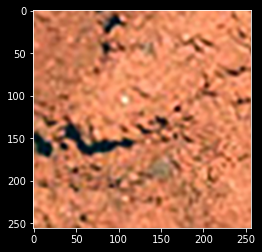

In [13]:
test_image_file_path = test_data_directory + r'/clay/Clay-Soil-1.jpg'
test_prediction = make_prediction(test_image_file_path)

print(test_prediction)

## Soil classification percentages
Soils are not perfectly homogenous (all one soil type). Soils are often a blend of types and may be better represented using a percentage. For example, the cell below shows a test photo labeled "silt"

In [6]:
percentage_photo = test_data_directory + r'/Silt/5.jpg'
im = cv2.imread(percentage_photo) # load image
plt.imshow(im[:,:,[2,1,0]])

TypeError: 'NoneType' object is not subscriptable

# Subdividing an image
Run these cells below to subdivide the existing training photos into smaller segments. The new directory will be called `train_divided` and `test_divided`.

The image will be divided into smaller tiles and classify each tile and compute its fraction from the total number of tiles generated.

Note: this will take time (~30 sec to 2 minutes)

In [27]:
def split_images(image_dir, save_dir):
    classification_list = ['Gravel', 'Sand', 'Silt']
    for class_ in classification_list:
        folder = image_dir + '/' + class_ + '/'
        save_folder = save_dir + '/' + class_ + '/'
        files = [f for f in listdir(folder) if isfile(join(folder, f))]

        for file in files:
            if '.ini' in file:
                continue
            fp = folder + file
            img = cv2.imread(fp)
            h,w,c = img.shape # height, width, color
            img_dim = 64
            # for cropping the images
            for r in range(0, img.shape[0], img_dim):
                for c in range(0, img.shape[1], img_dim):
                    cropped_img = img[r:r+img_dim, c:c+img_dim, :]
                    ch, cw, cc = cropped_img.shape
                    if ch == img_dim and cw == img_dim:
                        write_path = f"{save_folder + str(randrange(100000))}img{r}_{c}.jpg"
                        cv2.imwrite(write_path, cropped_img)
                    else: pass

In [28]:
try:
    parent = train_data_directory.replace('train', '')
    dirs = ['train_divided', 'test_divided']
    class_ = ['Gravel', 'Sand', 'Silt']
    for dir in dirs:
        os.mkdir(os.path.join(parent, dir))
        for classification in class_:
            os.mkdir(os.path.join(parent, dir, classification))

    # split training data
    split_images(
        image_dir = train_data_directory,
        save_dir = train_data_directory.replace('train', 'train_divided'))

    # split test images
    split_images(
        image_dir = test_data_directory, 
        save_dir = test_data_directory.replace('test', 'test_divided'))

except FileExistsError:
    pass

### Load model

In [29]:
model_fp = os.getcwd() + '/' + 'soil.h5'
print(model_fp)
model = load_model(model_fp)

c:\Users\ERIC ECHEMANE\Desktop\Projects\Model for Soil Type Classification\src/soil.h5


### Classify image
Use the loaded model to classify a test image. The function `classify_images` takes an image and a model and loops through each 256x256 square. It classifies each square and addes to the counter to create the fractional soil prediction. The function outputs the proportion of each soil type that was classified.

In [30]:
def classify_images(image_fp, model):
    classes = ['Gravel', 'Sand', 'Silt']
    gravel_count = 0
    sand_count = 0
    silt_count = 0

    img = cv2.imread(image_fp)
    img = cv2.resize(img, (1024, 1024))
    img_dim = 256

    for r in range(0, img.shape[0], img_dim):
        for c in range(0, img.shape[1], img_dim):
            cropped_img = img[r:r + img_dim, c:c + img_dim, :]
            h,w,c = cropped_img.shape
            if h == img_dim and w == img_dim:
                classification = model_classify(cropped_img, model)
                if classification == classes[0]:
                    gravel_count += 1
                elif classification == classes[1]:
                    sand_count += 1
                elif classification == classes[2]:
                    silt_count += 1
                else:
                    continue

        total_count = gravel_count + sand_count + silt_count

        proportion_array = [
            gravel_count / total_count, 
            sand_count / total_count, 
            silt_count / total_count]

        return proportion_array

def model_classify(cropped_img, model):
    classes = ['Gravel', 'Sand', 'Silt']
    image_array = cropped_img / 256
    img_batch = np.expand_dims(image_array, axis=0)
    prediction_array = model.predict(img_batch)[0]
    first_index = np.argmax(prediction_array)
    first_class = classes[first_index]
    return first_class

def classify_percentage(image_fp):
    start = time.time()
    out = classify_images(image_fp=image_fp, model = model)
    finish = str(round(time.time() - start, 5))

    im = cv2.imread(image_fp) # load image
    plt.imshow(im[:,:,[2,1,0]])

    print(f'''---
    Percentage Classification Results

    Gravel: {round(out[0] * 100, 2)}%)
    Sand: {round(out[1] * 100, 2)}%)
    Silt: {round(out[2] * 100, 2)}%)

    Time it takes to classify: {finish} seconds
    ''')

1/1 [==============================] - 0s 25ms/step
---
    Percentage Classification Results

    Gravel: 75.0%)
    Sand: 0.0%)
    Silt: 25.0%)

    Time it takes to classify: 0.22969 seconds
    


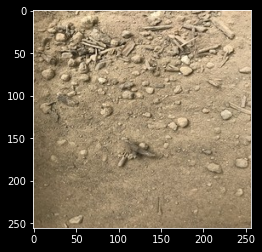

In [31]:
classify_percentage(image_fp = percentage_photo)